In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report

### Dataset - Iraninan Customer Churn

In [2]:
df = pd.read_csv(r'C:\Users\20236196\Desktop\Modules\Modelling & Simulation\Customer Churn.csv')

In [3]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

Anonymous Customer ID

Call Failures: number of call failures

Complains: binary (0: No complaint, 1: complaint)

Subscription Length: total months of subscription 

Charge Amount: Ordinal attribute (0: lowest amount, 9: highest amount)

Seconds of Use: total seconds of calls

Frequency of use: total number of calls

Frequency of SMS: total number of text messages

Distinct Called Numbers: total number of distinct phone calls 

Age Group: ordinal attribute (1: younger age, 5: older age)

Tariff Plan: binary (1: Pay as you go, 2: contractual)

Status: binary (1: active, 2: non-active)

Churn: binary (1: churn, 0: non-churn) - Class label

Customer Value: The calculated value of customer

In [5]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

### EDA

#### Churn Count

In [6]:
#Churn count
df['Churn'].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

#### Call Failures

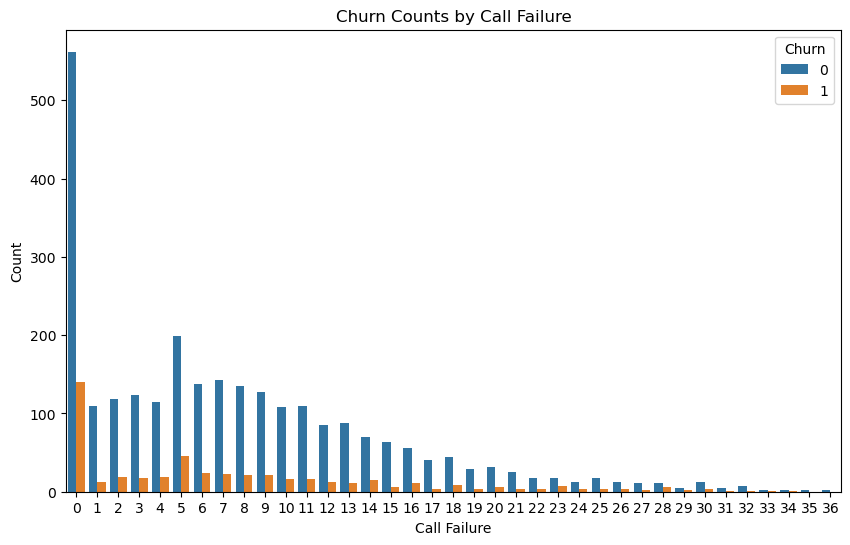

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Call  Failure', hue='Churn', data=df)
plt.xlabel('Call Failure')
plt.ylabel('Count')
plt.title('Churn Counts by Call Failure')
plt.show()

#CALLZ

#### Complaints (0 - No complains, 1 - Complains)

In [8]:
df.groupby('Complains')['Churn'].value_counts(normalize=True)

Complains  Churn
0          0        0.898591
           1        0.101409
1          1        0.829876
           0        0.170124
Name: proportion, dtype: float64

#Complaining is as good as churning!

#### Subscription Length

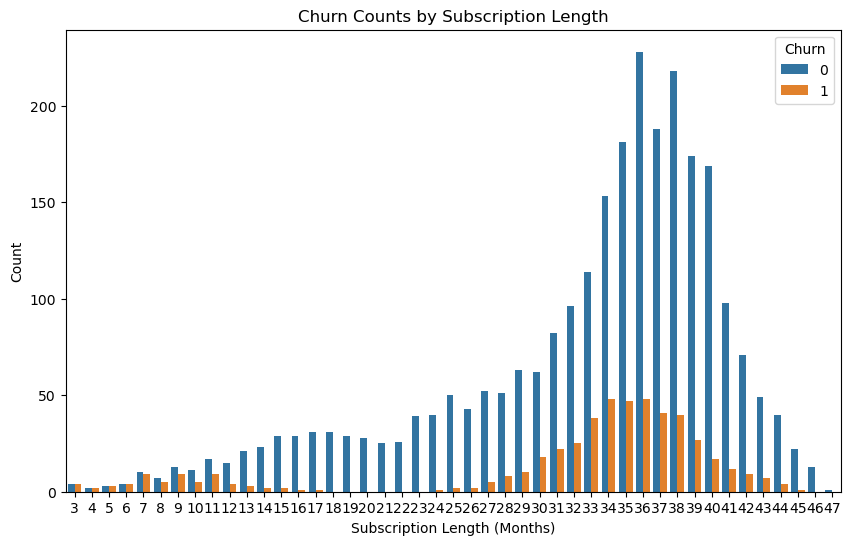

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Subscription  Length', hue='Churn', data=df)
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Count')
plt.title('Churn Counts by Subscription Length')
plt.show()

In [10]:
df.groupby('Subscription  Length')['Churn'].value_counts(normalize=True)

Subscription  Length  Churn
3                     0        0.500000
                      1        0.500000
4                     0        0.500000
                      1        0.500000
5                     0        0.500000
                                 ...   
44                    1        0.090909
45                    0        0.956522
                      1        0.043478
46                    0        1.000000
47                    0        1.000000
Name: proportion, Length: 82, dtype: float64

#The higher churning occurs in the first 6 months of subscription lenght, about 50% of churning.

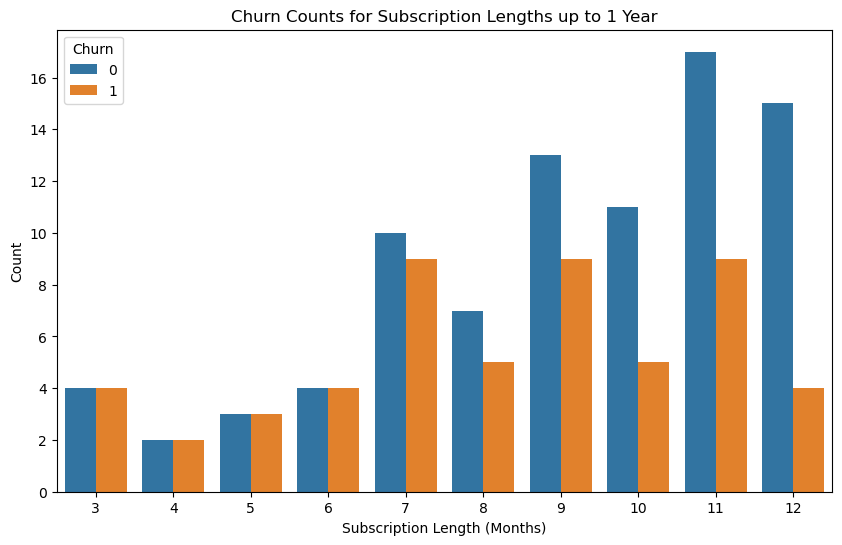

In [31]:
filtered_df = df[df['Subscription  Length'] <= 12]

plt.figure(figsize=(10, 6))

sns.countplot(x='Subscription  Length', hue='Churn', data=filtered_df)

# Set plot labels and title
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Count')
plt.title('Churn Counts for Subscription Lengths up to 1 Year')

# Show the plot
plt.show()

#### Charge Amount (0 - lowest charge, 9 - highest charge) 

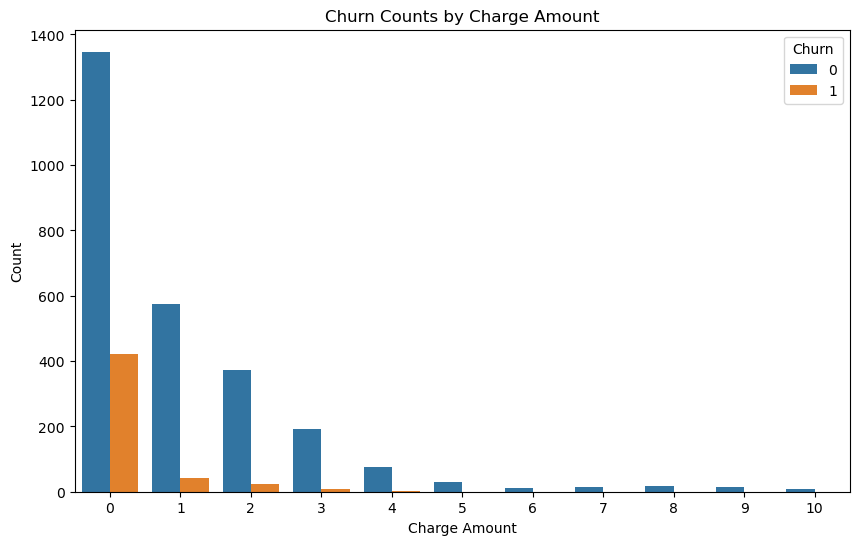

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Charge  Amount', hue='Churn', data=df)
plt.xlabel('Charge Amount')
plt.ylabel('Count')
plt.title('Churn Counts by Charge Amount')
plt.show()

#Charge amount doesn't seem to influence much churning

#### Frequency of use (total number of calls)

In [13]:
df.groupby('Frequency of use')['Churn'].value_counts(normalize=True)

Frequency of use  Churn
0                 1        0.525974
                  0        0.474026
1                 1        0.777778
                  0        0.222222
2                 1        0.600000
                             ...   
249               0        1.000000
250               0        1.000000
252               0        1.000000
254               0        1.000000
255               0        1.000000
Name: proportion, Length: 324, dtype: float64

#### Age group (1 - 5)

In [14]:
df.groupby('Age Group')['Churn'].value_counts(normalize=True)

Age Group  Churn
1          0        1.000000
2          0        0.822565
           1        0.177435
3          0        0.838596
           1        0.161404
4          0        0.800000
           1        0.200000
5          0        0.988235
           1        0.011765
Name: proportion, dtype: float64

The age group that presents the higher churning is the 4th

### Neural Networks Model

Churn
0    2655
1     495
Name: count, dtype: int64


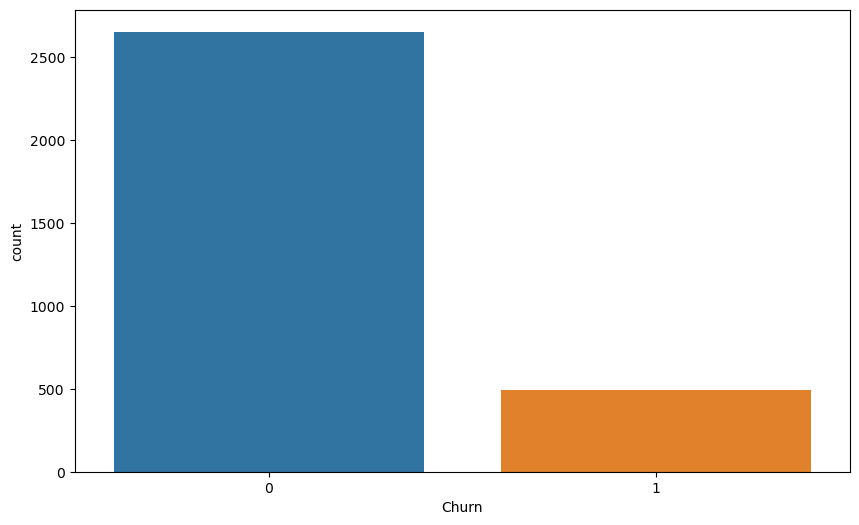

In [33]:
#Checking value counts of churn data
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn',data=df)
print(df['Churn'].value_counts())

In [16]:
#Balancing the data
majority_class = df[df['Churn'] == 0]
minority_class = df[df['Churn'] == 1]

upsampled_minority = resample(minority_class,
                              replace=True,  
                              n_samples=len(majority_class), 
                              random_state=42)  

balanced_data = pd.concat([majority_class, upsampled_minority])

Churn
0    2655
1    2655
Name: count, dtype: int64


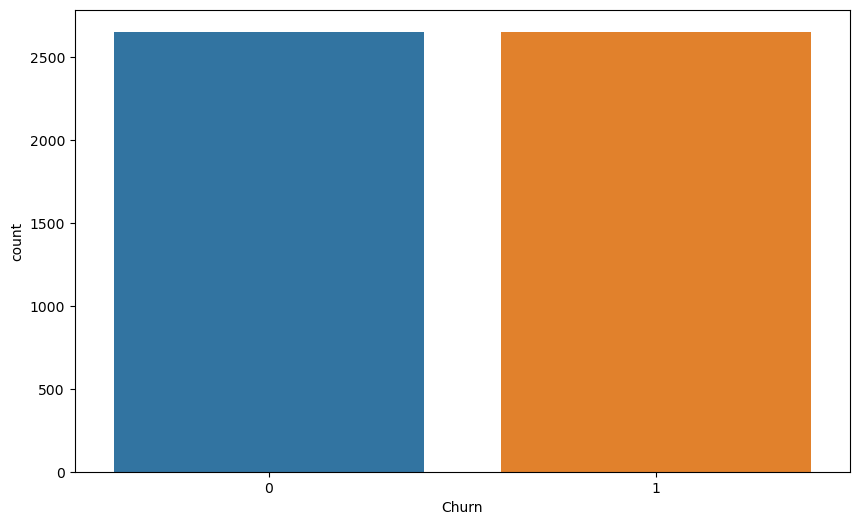

In [34]:
#Checking Balanced Data
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn',data=balanced_data)
print(balanced_data['Churn'].value_counts())

In [18]:
#Spliting indenpendent variable (y) from dependent variables (x)
X = balanced_data.drop('Churn',axis=1)
y = balanced_data['Churn']

In [19]:
#Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape :  (4248, 13)
X_test Shape :  (1062, 13)
y_train Shape :  (4248,)
y_test Shape :  (1062,)


In [20]:
#Feature Scaling - standardizes the range of input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
#Build NN Model
model = Sequential()
model.add(Dense(13, activation='relu', input_dim = 13))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 13)                182       
                                                                 
 dense_1 (Dense)             (None, 13)                182       
                                                                 
 dense_2 (Dense)             (None, 1)                 14        
                                                                 
Total params: 378 (1.48 KB)
Trainable params: 378 (1.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
#Training the model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split=0.2)


Epoch 1/100


107/107 [==============================] - 1s 2ms/step - loss: 0.6396 - accuracy: 0.6775 - val_loss: 0.5166 - val_accuracy: 0.8459
Epoch 2/100
107/107 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.8461 - val_loss: 0.3435 - val_accuracy: 0.8788
Epoch 3/100
107/107 [==============================] - 0s 1ms/step - loss: 0.3308 - accuracy: 0.8667 - val_loss: 0.2912 - val_accuracy: 0.8871
Epoch 4/100
107/107 [==============================] - 0s 1ms/step - loss: 0.2997 - accuracy: 0.8746 - val_loss: 0.2734 - val_accuracy: 0.8894
Epoch 5/100
107/107 [==============================] - 0s 1ms/step - loss: 0.2856 - accuracy: 0.8773 - val_loss: 0.2638 - val_accuracy: 0.8906
Epoch 6/100
107/107 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8773 - val_loss: 0.2550 - val_accuracy: 0.8929
Epoch 7/100
107/107 [==============================] - 0s 1ms/step - loss: 0.2677 - accuracy: 0.8808 - val_loss: 0.2490 - val_accuracy: 0.8

Text(0.5, 1.0, 'Loss Plot of NN Model')

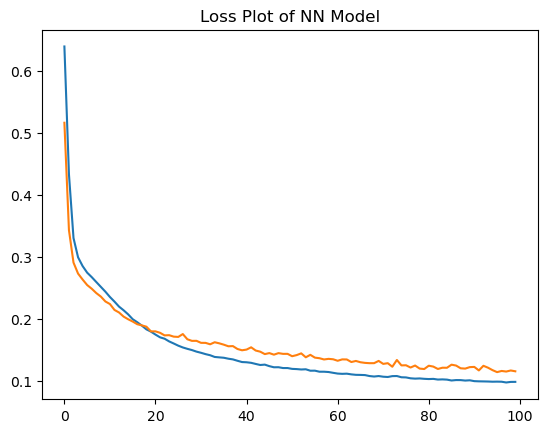

In [24]:
#Plotting Loss of NN Model
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Plot of NN Model')

Text(0.5, 1.0, 'Accuracy Plot of NN Model')

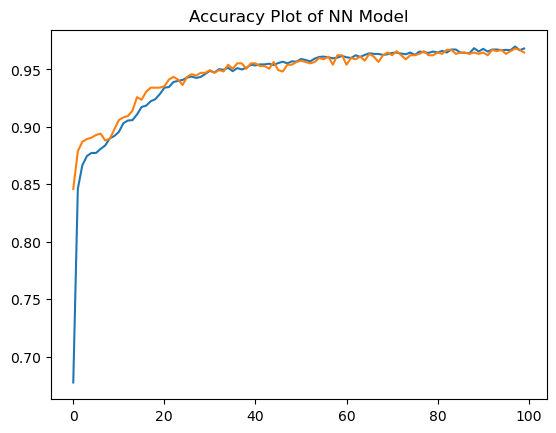

In [25]:
#Plotting Accuracy of NN Model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot of NN Model')

In [26]:
#Evaluating NN Model
model.evaluate(X_test_scaled,y_test)

34/34 [==============================] - 0s 837us/step - loss: 0.1054 - accuracy: 0.9548


[0.10538297891616821, 0.9548022747039795]

In [27]:
#Predicting the Churn values
y_pred = model.predict(X_test_scaled)
print(y_pred)
# unscaling the ypred values 
y_pred_lis = []
for i in y_pred:
    if i>0.5:
        y_pred_lis.append(1)
    else:
        y_pred_lis.append(0)
        
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':y_test, 'predicted_churn':y_pred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)        

34/34 [==============================] - 0s 601us/step
[[9.9935114e-01]
 [1.4303086e-03]
 [7.1145609e-02]
 ...
 [9.9600452e-01]
 [3.9539675e-19]
 [9.9976832e-01]]


,orignal_churn,predicted_churn
999,1,1
1197,0,0
2666,0,0
1544,0,0
1315,0,0
1022,1,1
2925,0,0
141,1,1
1403,0,0
1131,1,1


              precision    recall  f1-score   support

           0       0.99      0.92      0.95       550
           1       0.92      0.99      0.95       512

    accuracy                           0.95      1062
   macro avg       0.96      0.96      0.95      1062
weighted avg       0.96      0.95      0.95      1062



Text(95.72222222222221, 0.5, 'True_number')

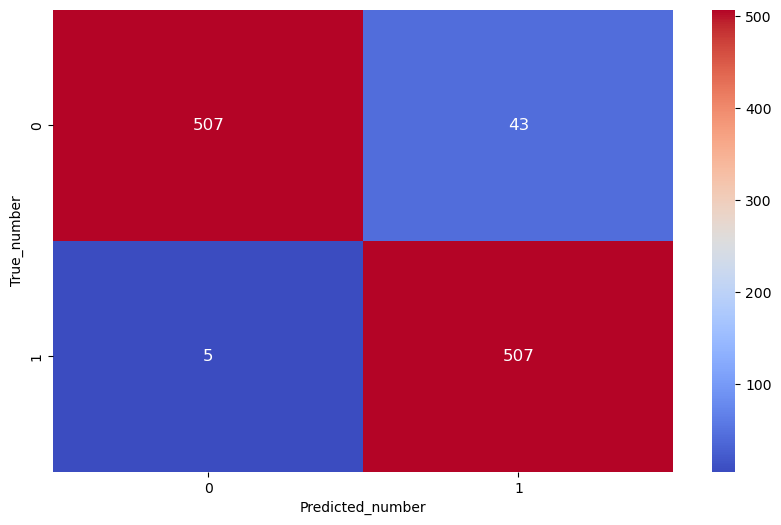

In [37]:
# Checking Performance Metrices
print(classification_report(y_test,y_pred_lis))
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_lis)
annot_kws = {"size": 12}
plt.figure(figsize = (10,6))
sns.heatmap(conf_mat, annot=True,fmt='d',cmap=sns.color_palette("coolwarm", as_cmap=True),annot_kws=annot_kws)
plt.xlabel('Predicted_number')
plt.ylabel('True_number')